<a href="https://colab.research.google.com/github/yashmith-r/Digital-Image-Processing-Lab-/blob/main/DIP_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Yashmith Raj - AP21110011218***

In [14]:
#Develop programs for following intensity transformation operation on a grayscale image.
#Collect any gray scale image from any source. Process that image using these operations.

#a. Image negative

#b. Log transformation and inverse log transform: s = c log (1+r), c is a constant, r ≥ 0. s is pixel intensity of output image,
# and r is the pixel intensity of input image. Study the effect of constant c on the quality of output image.

#c. Power law transformation: Study the effect of different values of Gamma used in this transformation.

#d. Contrast stretching

#e.Gray level slicing

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

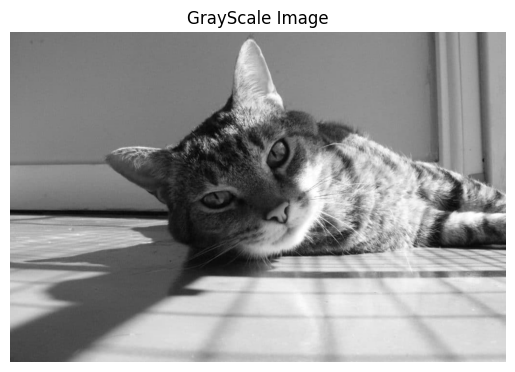

In [16]:
#_____________________________________________________________________________________________________________________
#Read, Display image
image = Image.open('grayscale-image.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('GrayScale Image')
plt.show()

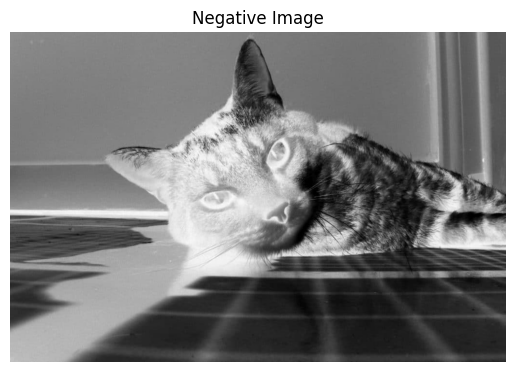

In [17]:
#a. Image Negative Transformation

image_array = np.array(img)

negative_image = 255 - image_array

plt.imshow(negative_image, cmap='gray')
plt.axis('off')
plt.title('Negative Image')
plt.show()

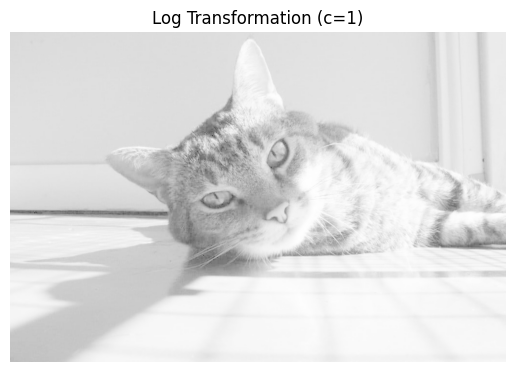

In [20]:
#b. Log Transformation
def log_transformation(image, c=1):
    return c * np.log1p(image)

c = 1
log_img = log_transformation(image_array, c=1)
log_img = np.uint8(255 * log_img / np.max(log_img))  # Normalize for display

plt.imshow(log_img, cmap='gray')
plt.axis('off')
plt.title(f'Log Transformation (c={c})')
plt.show()

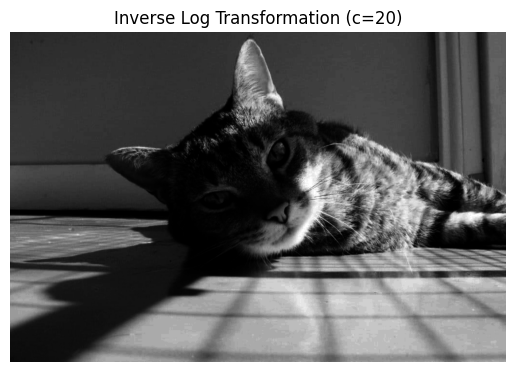

In [19]:
def inverse_log_transformation(image, c=1):
    return np.expm1(image / c)

recovered_img = inverse_log_transformation(log_img, c=c_values[-1])
recovered_img = np.uint8(255 * recovered_img / np.max(recovered_img))

plt.imshow(recovered_img, cmap='gray')
plt.axis('off')
plt.title(f'Inverse Log Transformation (c={c_values[-1]})')
plt.show()

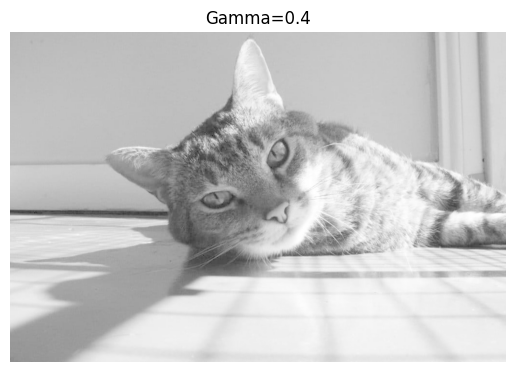

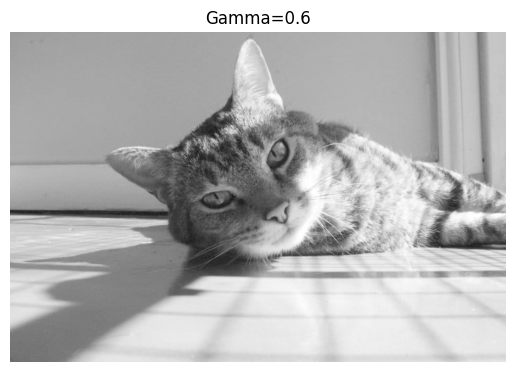

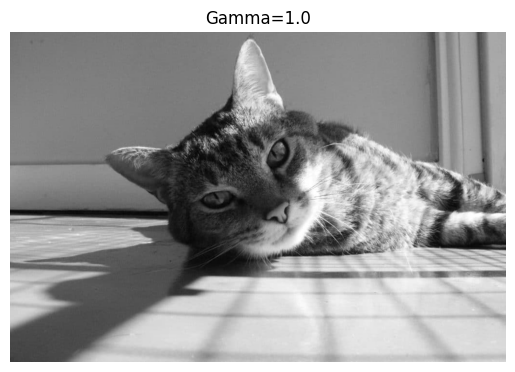

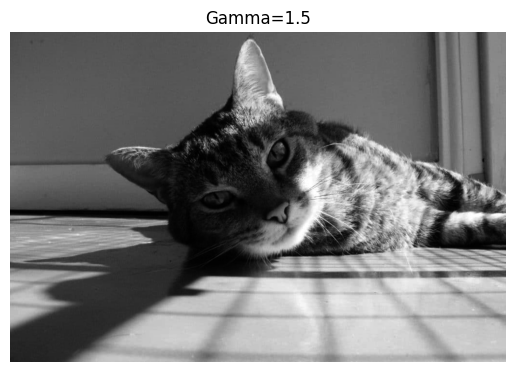

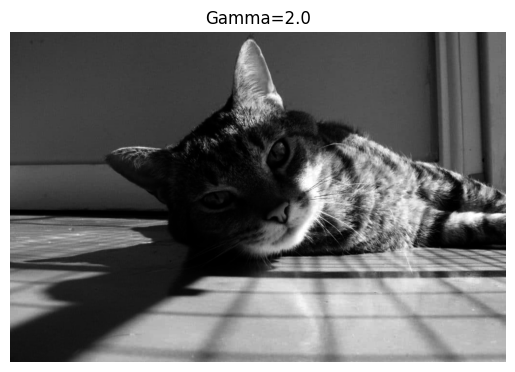

In [21]:
#c. Power Law Transformation (Gamma Correction)
def power_law(img, g, c=1):
    return c * np.power(img / 255.0, g) * 255

g_vals = [0.4, 0.6, 1.0, 1.5, 2.0]

for g in g_vals:
    g_img = power_law(image_array, g=g)
    g_img = np.uint8(g_img)

    plt.imshow(g_img, cmap='gray')
    plt.axis('off')
    plt.title(f'Gamma={g}')
    plt.show()

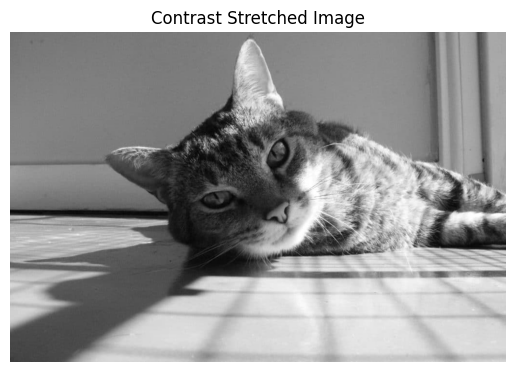

In [22]:
#d Contrast Stretching
def contrast_stretch(img, r_min=0, r_max=255, s_min=0, s_max=255):
    r_min_img, r_max_img = np.min(img), np.max(img)
    stretched = (img - r_min_img) * ((s_max - s_min) / (r_max_img - r_min_img)) + s_min
    return np.clip(stretched, s_min, s_max)

stretched_img = contrast_stretch(image_array)

plt.imshow(np.uint8(stretched_img), cmap='gray')
plt.axis('off')
plt.title('Contrast Stretched Image')
plt.show()

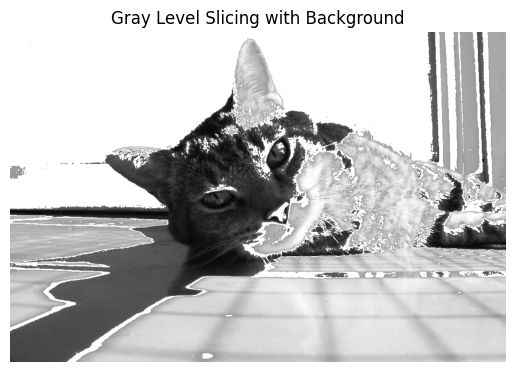

In [24]:
#e. Gray Level Slicing
def gray_slice(img, low, high, bg=True):
    sliced = np.zeros_like(img)
    if bg:
        sliced = img.copy()
    sliced[(img >= low) & (img <= high)] = 255
    return sliced

low, high = 100, 150
sliced_img = gray_slice(image_array, low, high, bg=True)

plt.imshow(sliced_img, cmap='gray')
plt.axis('off')
plt.title('Gray Level Slicing')
plt.show()
